In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore")

<span style="color:blue">
    
## Reading the dataset

In [2]:
bike = pd.read_csv("day.csv")
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


<span style="color:blue">

## Understanding the data

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

<span style="color:blue">
    
No null values & datatypes in order for all variables

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<span style="color:red">
    
### _No missing values found, data in order_

In [7]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

<span style="color:blue">

## Dropping the below features

### 1. instant 
####        _serial numbers only_
        
### 2. temp
####        _temp & atemp following the same patterns in dataset and hence can be dropped, atemp is the feel factor dependent on temperature_

### 3. casual & registered
####       _cnt is the total count of users comprising of the no. of casual & registered users and hence not required_

### 4. dteday
####       _the prediction model does not require a time based prediction and hence the values may be dropped_

In [9]:
bike=bike.drop(["instant","temp","casual","registered","dteday"],axis=1)

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


<span style="color:blue">

## Visualising the features against the target variable 'cnt' 

<Figure size 1440x864 with 0 Axes>

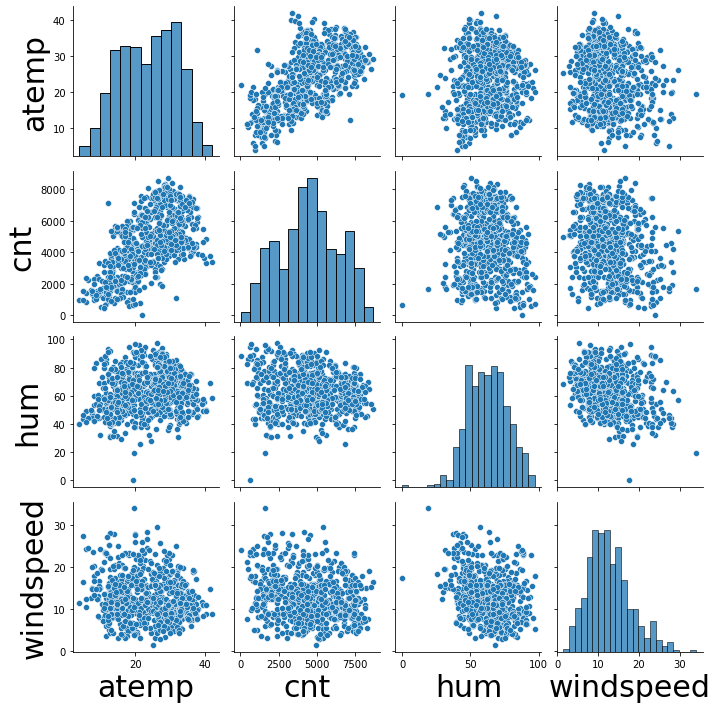

In [11]:
plt.figure(figsize=(20,12))
num_var= bike[["atemp","cnt","hum","windspeed"]]
sns.set_context( rc={"axes.labelsize":30})
sns.pairplot(num_var)


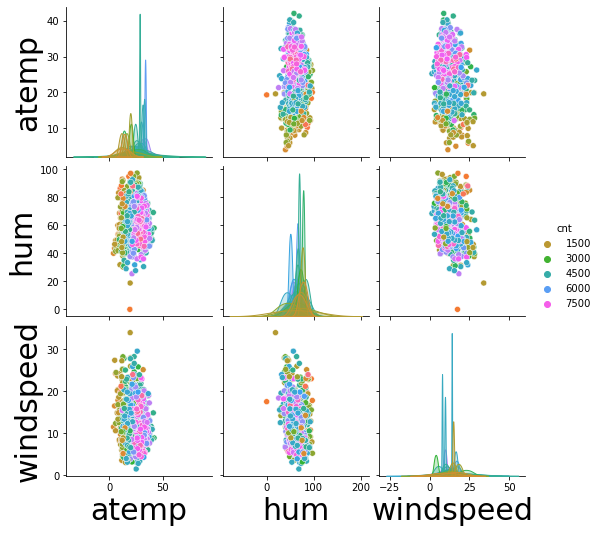

In [12]:

num_var= bike[["atemp","cnt","hum","windspeed"]]
sns.set_context( rc={"axes.labelsize":30})
sns.pairplot(num_var,hue="cnt" ,palette="husl")
plt.show()

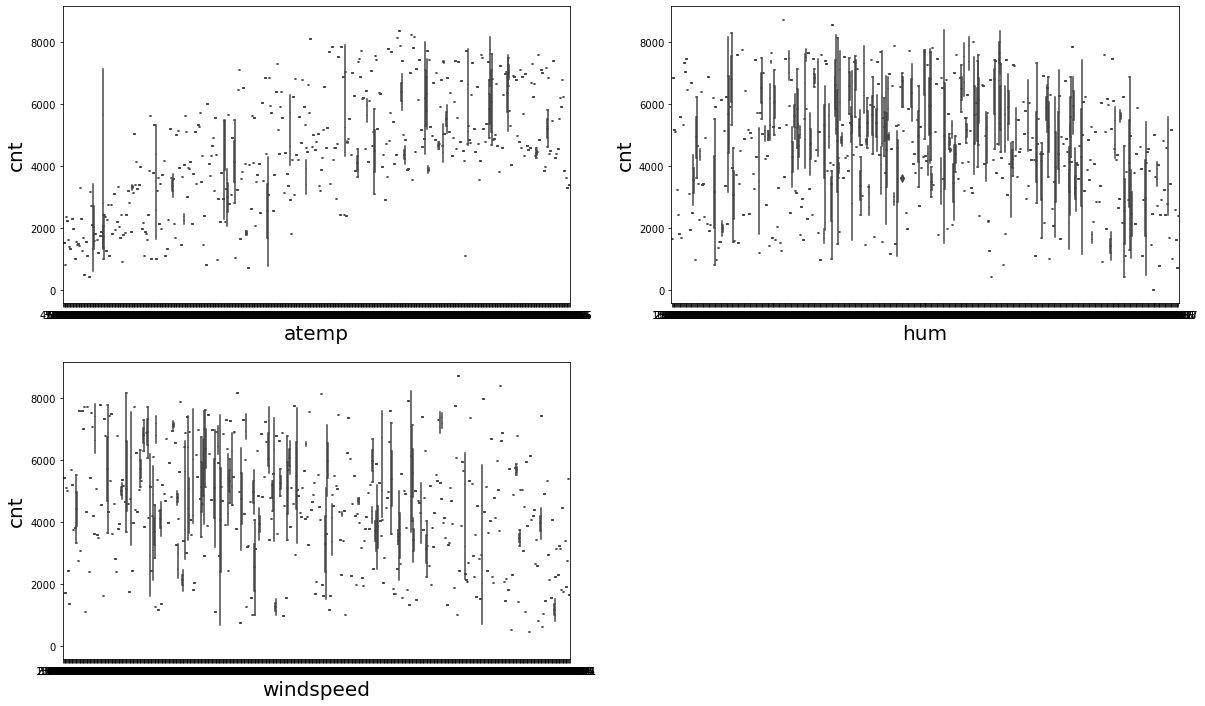

In [13]:
sns.set_context( rc={"axes.labelsize":20})
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x="atemp", y="cnt", data=bike)
plt.subplot(2,2,2)
sns.boxplot(x="hum", y="cnt", data=bike)
plt.subplot(2,2,3)
sns.boxplot(x="windspeed", y="cnt", data=bike)
plt.show()

In [14]:

bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

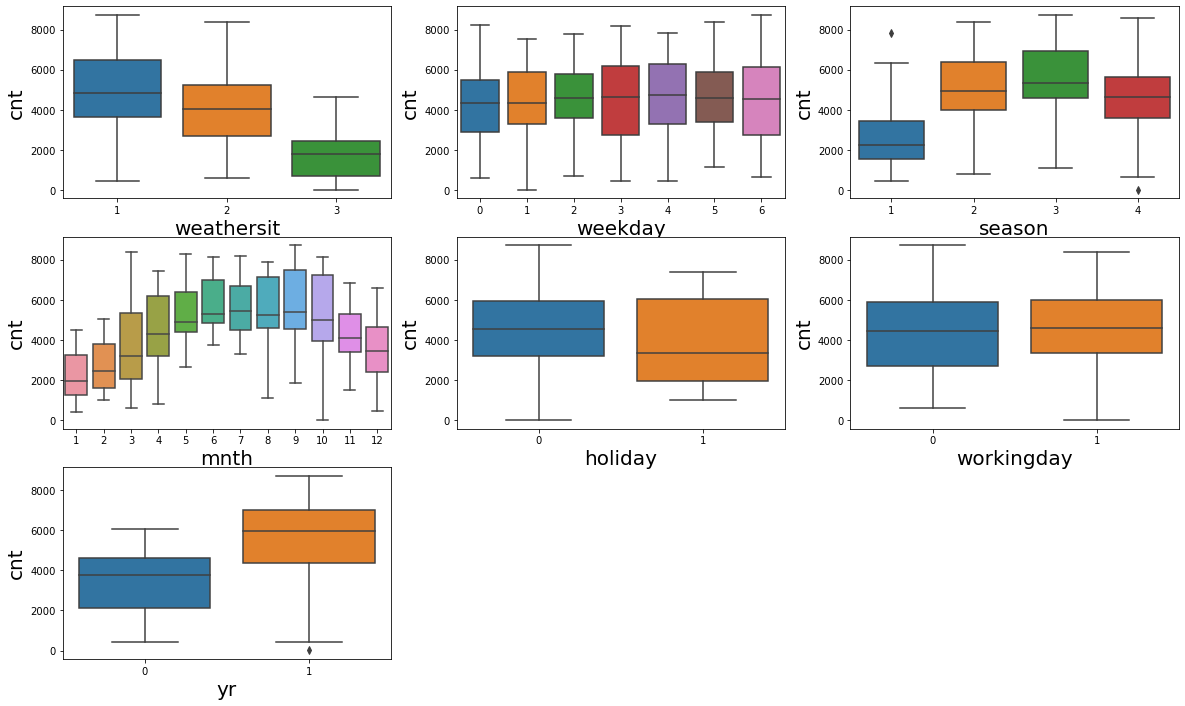

In [15]:
sns.set_context( rc={"axes.labelsize":20})
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x="weathersit", y="cnt", data=bike)
plt.subplot(3,3,2)
sns.boxplot(x="weekday", y="cnt", data=bike)
plt.subplot(3,3,3)
sns.boxplot(x="season", y="cnt", data=bike)
plt.subplot(3,3,4)
sns.boxplot(x="mnth", y="cnt", data=bike)
plt.subplot(3,3,5)
sns.boxplot(x="holiday", y="cnt", data=bike)
plt.subplot(3,3,6)
sns.boxplot(x="workingday", y="cnt", data=bike)
plt.subplot(3,3,7)
sns.boxplot(x="yr", y="cnt", data=bike)
plt.show()

<span style="color:blue">

## Dropping features
### 1. weekday
####     _no correlation with 'cnt', the medians of all days are similar and almost equally distributed_
### 2. workingday
####     _no correlation with 'cnt', the medians of workingday days are similar and almost equally distributed, moreover its highly correlated with holiday_


In [16]:
bike= bike.drop(["weekday","workingday"], axis=1)

<span style="color:blue">
    
### Assigning dummy variables to weathersit, mnth and seasons using one hot method and assigning meaningful names to the data

In [17]:
weather_sit= pd.get_dummies(bike["weathersit"],drop_first=True)
weather_sit= weather_sit.rename(columns={2:"2:mist",3:"3:light_snow_rain"})
bike= pd.concat([bike, weather_sit],axis=1)
bike= bike.drop("weathersit", axis=1)
bike.head()


,season,yr,mnth,holiday,atemp,hum,windspeed,cnt,2:mist,3:light_snow_rain
0,1,0,1,0,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,9.47025,43.7273,16.636703,1349,0,0
3,1,0,1,0,10.60610,59.0435,10.739832,1562,0,0
4,1,0,1,0,11.46350,43.6957,12.522300,1600,0,0


In [18]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [19]:
season_dum= pd.get_dummies(bike["season"],drop_first=True)
season_dum= season_dum.rename(columns={2:"2:summer",3:"3:fall",4:"4:winter"})
bike= pd.concat([bike,season_dum],axis=1)
bike= bike.drop("season", axis=1)
bike.head()

,yr,mnth,holiday,atemp,hum,windspeed,cnt,2:mist,3:light_snow_rain,2:summer,3:fall,4:winter
0,0,1,0,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,0,1,0,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,0,1,0,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [20]:
month_dum= pd.get_dummies(bike["mnth"],drop_first=True)
month_dum= month_dum.rename(columns={2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
bike= pd.concat([bike,month_dum],axis=1)
bike= bike.drop("mnth", axis=1)
bike.head()

,yr,holiday,atemp,hum,windspeed,cnt,2:mist,3:light_snow_rain,2:summer,3:fall,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.47025,43.7273,16.636703,1349,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,10.60610,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,11.46350,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
bike.head()

,yr,holiday,atemp,hum,windspeed,cnt,2:mist,3:light_snow_rain,2:summer,3:fall,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.47025,43.7273,16.636703,1349,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,10.60610,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,11.46350,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
bike.shape

(730, 22)

<span style="color:blue">

## Splitting the dataset into train and test sets in 70:30 ratio

In [23]:
df_train, df_test= train_test_split(bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 22)
(220, 22)


<span style="color:blue">

## Scaling the numeric features in train dataset

In [24]:
scaler= MinMaxScaler()

In [25]:
num_var= ["atemp","cnt","hum","windspeed"]

In [26]:
df_train[num_var]= scaler.fit_transform(df_train[num_var])
df_train.head(10)

,yr,holiday,atemp,hum,windspeed,cnt,2:mist,3:light_snow_rain,2:summer,3:fall,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
576,1,0,0.766351,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,0.204096,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0.391735,0.504508,0.188475,0.482973,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,0.318819,0.751824,0.380981,0.191095,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
580,1,0,0.882350,0.632030,0.462538,0.782559,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
500,1,0,0.678508,0.719193,0.172431,0.851588,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
479,1,0,0.513565,0.440962,0.164434,0.710308,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
472,1,0,0.496135,0.586518,0.270032,0.499885,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
455,1,0,0.443956,0.696865,0.279394,0.692476,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


<span style="color:blue">

## Defining datasets for target variable and features

In [27]:
y_train= df_train.pop("cnt")
X_train = df_train
X_train.head()

,yr,holiday,atemp,hum,windspeed,2:mist,3:light_snow_rain,2:summer,3:fall,4:winter,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
576,1,0,0.766351,0.725633,0.264686,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0.391735,0.504508,0.188475,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,0.318819,0.751824,0.380981,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

<span style="color:blue">

## Fitting & training the model using RFE and selecting 15 features(conservative approach) for the model analysis
### Approach:

1. Build a model with 15 optimum features out of 22
2. Check the RFE rankings
3. Shrinking the feature volume basis analysis of RFE rankings

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,15)
rfe= rfe.fit(X_train, y_train)


In [31]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2:mist', True, 1),
 ('3:light_snow_rain', True, 1),
 ('2:summer', True, 1),
 ('3:fall', True, 1),
 ('4:winter', True, 1),
 ('Feb', False, 5),
 ('Mar', True, 1),
 ('Apr', False, 3),
 ('May', True, 1),
 ('Jun', False, 2),
 ('Jul', False, 4),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 6),
 ('Dec', False, 7)]

<span style="color:blue">

### Shrinking the feature volume

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,12)
rfe= rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2:mist', True, 1),
 ('3:light_snow_rain', True, 1),
 ('2:summer', True, 1),
 ('3:fall', True, 1),
 ('4:winter', True, 1),
 ('Feb', False, 8),
 ('Mar', False, 4),
 ('Apr', False, 6),
 ('May', False, 3),
 ('Jun', False, 5),
 ('Jul', False, 7),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', False, 2),
 ('Nov', False, 9),
 ('Dec', False, 10)]

In [34]:
col= X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', '2:mist',
       '3:light_snow_rain', '2:summer', '3:fall', '4:winter', 'Aug', 'Sep'],
      dtype='object')

<span style="color:blue">

### Fitting the model with 12 features using RFE automated approach for further analysis

In [35]:
X_train_rfe = X_train[col]

In [36]:
X_train_sm= sm.add_constant(X_train_rfe)

In [37]:
lm = sm.OLS(y_train, X_train_sm).fit()

In [38]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.75e-187
Time:                        19:56:01   Log-Likelihood:                 501.93
No. Observations:                 510   AIC:                            -977.9
Df Residuals:                     497   BIC:                            -922.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2308      0.02

In [46]:
vif= pd.DataFrame()
X = X_train_rfe
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,atemp,21.67
3,hum,15.51
8,3:fall,7.54
4,windspeed,3.61
7,2:summer,3.32
9,4:winter,2.50
5,2:mist,2.14
0,yr,2.02
10,Aug,1.85
11,Sep,1.49


In [47]:
X_train_new= X_train_rfe.drop("3:fall", axis=1) 
# Dropping the 3:fall from weathersit feature due to high p-value(p-value range selected 5%)

In [48]:
X_train_sm= sm.add_constant(X_train_new)

In [49]:
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.49e-187
Time:                        19:57:14   Log-Likelihood:                 500.06
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     498   BIC:                            -925.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2306      0.02

In [50]:
vif= pd.DataFrame()
X = X_train_new
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,hum,14.69
2,atemp,9.73
4,windspeed,3.58
5,2:mist,2.13
0,yr,2.01
7,2:summer,1.84
8,4:winter,1.74
9,Aug,1.55
10,Sep,1.30
6,3:light_snow_rain,1.16


In [51]:
# Dropping hum feature due to high VIF
X_train_new= X_train_new.drop("hum", axis=1)
X_train_new

,yr,holiday,atemp,windspeed,2:mist,3:light_snow_rain,2:summer,4:winter,Aug,Sep
576,1,0,0.766351,0.264686,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,0
728,1,0,0.200348,0.663106,0,0,0,0,0,0
482,1,0,0.391735,0.188475,1,0,1,0,0,0
111,0,0,0.318819,0.380981,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.824359,0.187140,0,0,0,0,1,0
53,0,0,0.218747,0.111379,0,0,0,0,0,0
350,0,0,0.223544,0.431816,1,0,0,1,0,0
79,0,0,0.434043,0.529881,1,0,1,0,0,0


In [52]:
X_train_sm= sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.05e-184
Time:                        19:57:15   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1275      0.01

In [53]:
vif= pd.DataFrame()
X = X_train_new
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,atemp,4.92
3,windspeed,3.05
0,yr,2.00
6,2:summer,1.83
8,Aug,1.55
7,4:winter,1.50
4,2:mist,1.49
9,Sep,1.30
5,3:light_snow_rain,1.08
1,holiday,1.04


<span style="color:red">

### _Above data parameters found in order basis r2, p-values & VIF, model acceptable for predictions_
    

<span style="color:blue">

## Verifying the correlations between the selected features for the MLR model

<AxesSubplot:>

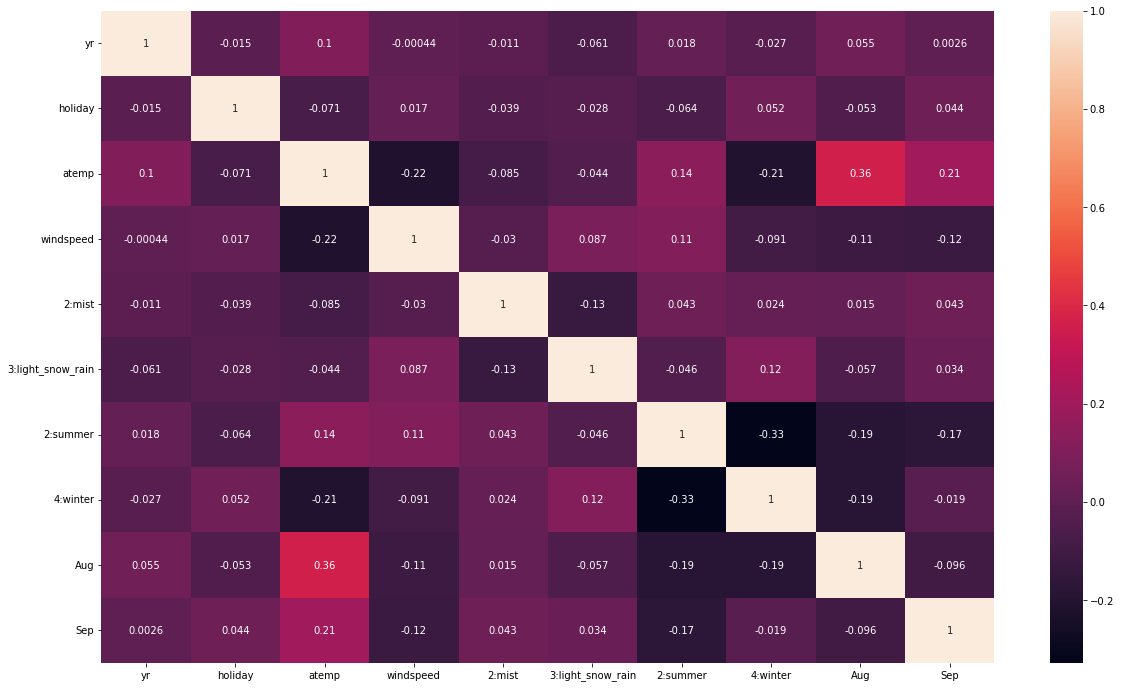

In [54]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train_new.corr(), annot=True)

<span style="color:red">

### _none of the features are highly correlated_

<span style="color:blue">

## Residual Analysis

In [55]:
# Model prediction
y_train_pred = lm.predict(X_train_sm)

<span style="color:blue">

### Checking for normal distribution of error terms in the predicted model

Text(0.5, 0, 'Errors')

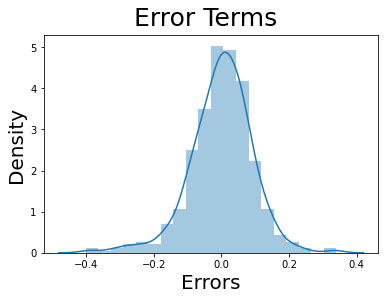

In [56]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 25)                 
plt.xlabel('Errors', fontsize = 20)  

<span style="color:blue">

## Scaling the test dataset

In [57]:
num_var= ["atemp","cnt","hum","windspeed"]

In [58]:
df_test[num_var]= scaler.transform(df_test[num_var])
df_test.head(10)

,yr,holiday,atemp,hum,windspeed,cnt,2:mist,3:light_snow_rain,2:summer,3:fall,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
184,0,1,0.769660,0.657364,0.084219,0.692706,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,0.842587,0.610133,0.153728,0.712034,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0.496145,0.837699,0.334206,0.303382,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,0.795343,0.437098,0.339570,0.547400,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0.741471,0.314298,0.537414,0.569029,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
404,1,0,0.240105,0.579218,0.326196,0.438104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0.820207,0.671103,0.372990,0.510354,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
171,0,0,0.733207,0.793903,0.276724,0.553728,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
512,1,1,0.787883,0.696865,0.331536,0.692706,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
200,0,0,0.876552,0.728638,0.153738,0.495858,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [59]:
y_test= df_test.pop("cnt")
X_test = df_test
X_test.head()

,yr,holiday,atemp,hum,windspeed,2:mist,3:light_snow_rain,2:summer,3:fall,4:winter,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
184,0,1,0.769660,0.657364,0.084219,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,0.842587,0.610133,0.153728,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0.496145,0.837699,0.334206,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,0.795343,0.437098,0.339570,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0.741471,0.314298,0.537414,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

<span style="color:blue">

## Prediction model and evaluation

In [61]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

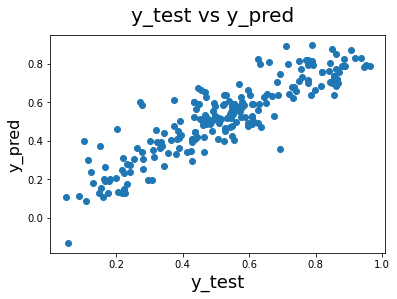

In [62]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.79425209298371


<span style="color:red">

### _Predicted model seems linearly alighned with satisfactory r2 values_
### _( r2 value of train model is 83% and predicted model is 79%, model is satisfactory)_
    
   

<span style="color:red">

### _Best fit line_


#### cnt = 0.125 + 0.2334 x _yr_ - 0.0934 x _holiday_ + 0.5370 x _atemp_ - 0.1319 x _windspeed_ -0.0822 x _2:mist_ - 0.2760  x _3:light_snow_rain_ + 0.0990 x _2:summer_ +0.1311 x _4:winter_ + 0.0679 x _Aug_ + 0.1209 x _Sep_